<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0     207 non-null float64
1     207 non-null float64
2     207 non-null float64
3     207 non-null float64
4     207 non-null float64
5     207 non-null float64
6     207 non-null float64
7     207 non-null float64
8     207 non-null float64
9     207 non-null float64
10    207 non-null float64
11    207 non-null float64
12    207 non-null float64
13    207 non-null float64
14    207 non-null float64
15    207 non-null float64
16    207 non-null float64
17    207 non-null float64
18    207 non-null float64
19    207 non-null float64
20    207 non-null float64
21    207 non-null float64
22    207 non-null float64
23    207 non-null float64
24    207 non-null float64
25    207 non-null float64
26    207 non-null float64
27    207 non-null float64
28    207 non-null float64
29    207 non-null float64
30    207 non-null float64
31    207 non-null float64
32    207 non-null float64
33  

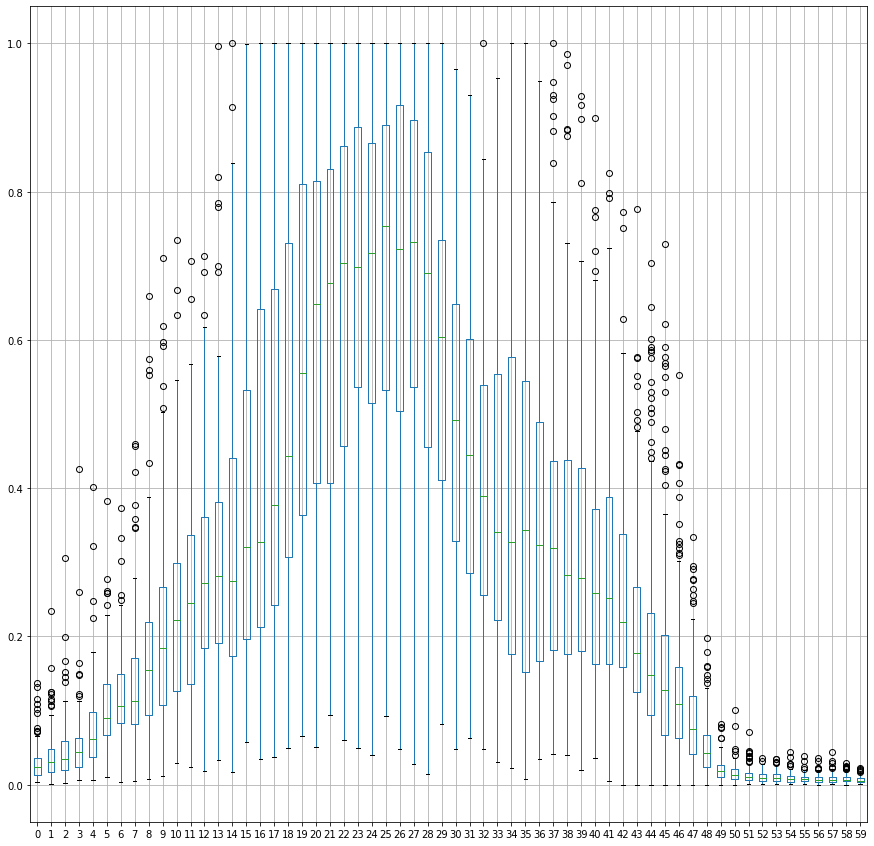

60    1.000000
35    0.253962
34    0.235401
36    0.192997
33    0.163923
30    0.149021
31    0.100984
32    0.098595
37    0.045525
39    0.025325
29    0.012009
56    0.009195
59    0.009135
16   -0.003505
17   -0.011262
25   -0.011571
28   -0.017166
15   -0.020229
26   -0.029053
24   -0.031248
38   -0.036437
14   -0.039172
58   -0.063132
40   -0.063956
27   -0.064469
54   -0.070059
55   -0.090902
23   -0.110345
13   -0.119925
6    -0.134967
        ...   
18   -0.159407
49   -0.170996
5    -0.172164
22   -0.175139
52   -0.188829
53   -0.203284
2    -0.205419
21   -0.208059
7    -0.208663
41   -0.210330
20   -0.224632
19   -0.225255
1    -0.267519
42   -0.277439
12   -0.283822
43   -0.286918
50   -0.298017
0    -0.299071
51   -0.305769
3    -0.306110
46   -0.316937
47   -0.317323
45   -0.318088
4    -0.319795
8    -0.333407
11   -0.334920
48   -0.338669
44   -0.372854
9    -0.375020
10   -0.438855
Name: 60, Length: 61, dtype: float64
Enter your choice,1:For Decesion tree,2:For rand

/home/tapan/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [1]:
import pandas as pd
import numpy as np
import os
import tarfile
import matplotlib.pyplot as plt
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA


#Function for importing file
def load_sonarmines(sonar_path):
    csv_path=os.path.join(sonar_path,"sonar.all-data")
    return pd.read_csv(csv_path)


#function for modifying the data
def data_modify(df):
    
    
    #change the coulmn names
    df.columns=range(0,61)
    #TO KNOW THE DATA-TYPE OF  THE DATA 
    #TO CHECK SIZE Of DATA AND IF THERE IS ANTY NULL VALUES
    df.info()
    #use label encoder to cahnge R and M to 0 and 1
    encoder=LabelEncoder()
    material_cat=df[60]
    df.iloc[:,-1]=encoder.fit_transform(material_cat)
    #selecting the feature and prdiction columns
    
    x=df.iloc[:,0:60]
    y=df.iloc[:,-1]
    
    
    return(x,y)
#function for splitting train-test data
def test_train_split(x,y,test_size,random_state):
    train_set_x,test_set_x,train_set_y,test_set_y=train_test_split(x,y,test_size=test_size,random_state=random_state)
    return(train_set_x,test_set_x,train_set_y,test_set_y)

#function for data analysis
def data_analysis(train_set_x,train_set_y):
    #TO COUNT THE NUMBER OF SONAR REFLECTED OF ROCKS AND METALS
    print(train_set_y.iloc[:].value_counts())
    #TO GET THE BASIC STASTICS ABOUT THE DATA
    print(train_set_x.describe())
    #TO KNOW THE DESTRIBUTION OF THE FEATURES IN THE DATA-SET
    train_x_y=pd.concat([train_set_x,train_set_y],axis=1,sort=False)
    train_set_x.boxplot(figsize=(15,15))
    plt.show()
    corr_matrix=train_x_y.corr()
    print(corr_matrix[60].sort_values(ascending=False))

    
    
#Decesion tree Classifier with grid search
def DT_Classifier(train_set_x,train_set_y,test_set_x,test_set_y):
    param_grid={'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_split':range(2,10),'splitter':['best','random']}
    clf=DecisionTreeClassifier(random_state=42)
    
    grid_obj=GridSearchCV(clf,param_grid,cv=5)
    grid_fit=grid_obj.fit(train_set_x,train_set_y)
    y_pred=grid_fit.best_estimator_.predict(test_set_x)
    print(grid_obj.best_estimator_)
    print("Test accuracy",accuracy_score(test_set_y,y_pred))
    print("Best Score",grid_fit.best_score_)
    return(y_pred)
#Random Forest with Grid search
def rand_clf(train_set_x,train_set_y,test_set_x,test_set_y):
    param_grid={'max_depth':range(3,9),'n_estimators':[75,100,125,200,],'min_samples_split':[2,3,5],'max_features':[2,3]}
    clf=RandomForestClassifier(criterion='entropy',random_state=42)
    grid_obj=GridSearchCV(clf,param_grid,cv=5)
    grid_fit=grid_obj.fit(train_set_x,train_set_y)
    y_pred=grid_fit.best_estimator_.predict(test_set_x)
    print(grid_obj.best_estimator_)
    print("Test accuracy",accuracy_score(test_set_y,y_pred))
    print("Best Score",grid_fit.best_score_)
    return(y_pred)
#SVM model with Grid Search
def svm_clf(train_set_x,train_set_y,test_set_x,test_set_y):
    param_grid={'C':[0.01,0.001,0.1,1,10,100],'gamma':[0.01,0.1,1,10],'kernel':['poly']}
    grid_obj=GridSearchCV(svm.SVC(random_state=42),param_grid,cv=5,scoring='roc_auc')
    grid_fit=grid_obj.fit(train_set_x,train_set_y)
    y_pred=grid_fit.predict(test_set_x)
    print(grid_obj.best_estimator_)
    print("Test accuracy",grid_fit.score(test_set_x,test_set_y))
    print("Test accuracy",accuracy_score(test_set_y,y_pred))
    print("Best Score",grid_fit.best_score_)
    df=grid_obj.cv_results_
    
    return(y_pred)

#Function for calculation of accuracy matrix
def Cal_accuracy(test_set_y,y_pred):
    print(confusion_matrix(test_set_y,y_pred))
    print(accuracy_score(test_set_y,y_pred)*100)
    print(classification_report(test_set_y,y_pred))
    
       
#main function to choose among the following classifiers 
def main():
    SONAR_PATH="/home/tapan/"
    df=load_sonarmines(SONAR_PATH)
    x,y=data_modify(df)
    train_set_x,test_set_x,train_set_y,test_set_y=test_train_split(x,y,0.3,42)
    data_analysis(train_set_x,train_set_y)
    val=int(input("Enter your choice,1:For Decesion tree,2:For random forest,3:For SVM Classifier "))
    if val==1 :
        y_pred=DT_Classifier(train_set_x,train_set_y,test_set_x,test_set_y)
    if val==2:
          y_pred= rand_clf(train_set_x,train_set_y,test_set_x,test_set_y)
    else:
        
         y_pred=svm_clf(train_set_x,train_set_y,test_set_x,test_set_y)
   
    #y_pred=DT_Classifier(train_set_x,train_set_y,test_set_x,test_set_y)
    #y_pred= rand_clf(train_set_x,train_set_y,test_set_x,test_set_y)
    #y_pred=svm_clf(train_set_x,train_set_y,test_set_x,test_set_y)
    Cal_accuracy(test_set_y,y_pred)
if __name__ == '__main__':
	
	main()    










FileNotFoundError: [Errno 2] File b'sonar.all-data/sonar.all-data' does not exist: b'sonar.all-data/sonar.all-data'